<a href="https://colab.research.google.com/github/jaiindian1/MOkshaAi/blob/main/tata_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
tata = pd.read_excel('tata_sales.xlsx', engine='openpyxl')
tata.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [17]:
tata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [18]:
tata.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [19]:
tata_clean = tata.dropna(subset=['CustomerID'])

In [22]:
tata_clean =tata_clean.dropna(subset=['Description'])

In [24]:
tata_clean = tata_clean[(tata_clean['Quantity'] >= 1) & (tata_clean['UnitPrice'] > 0)]

In [26]:
tata_clean.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [27]:
tata_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [31]:
# 1. Create a Year-Month column for easy grouping
tata_clean['Month_Year'] = tata_clean['InvoiceDate'].dt.to_period('M')
tata_clean['Revenue'] = tata_clean['UnitPrice'] * tata_clean['Quantity']


In [34]:
monthly_revenue = tata_clean.groupby('Month_Year')['Revenue'].sum().reset_index()
print(monthly_revenue)

   Month_Year      Revenue
0     2010-12   572713.890
1     2011-01   569445.040
2     2011-02   447137.350
3     2011-03   595500.760
4     2011-04   469200.361
5     2011-05   678594.560
6     2011-06   661213.690
7     2011-07   600091.011
8     2011-08   645343.900
9     2011-09   952838.382
10    2011-10  1039318.790
11    2011-11  1161817.380
12    2011-12   518192.790


In [35]:
monthly_summary = tata_clean.groupby('Month_Year')['Revenue'].sum().reset_index()

# 3. Rename the column so it's clear for the CEO
monthly_summary.columns = ['Month', 'Total_Monthly_Revenue']

print(monthly_summary)

      Month  Total_Monthly_Revenue
0   2010-12             572713.890
1   2011-01             569445.040
2   2011-02             447137.350
3   2011-03             595500.760
4   2011-04             469200.361
5   2011-05             678594.560
6   2011-06             661213.690
7   2011-07             600091.011
8   2011-08             645343.900
9   2011-09             952838.382
10  2011-10            1039318.790
11  2011-11            1161817.380
12  2011-12             518192.790


In [36]:
monthly_revenue_sorted = monthly_revenue.sort_values(by='Revenue', ascending=False)

# View the Top 5 months
print("--- Top 5 Performing Months ---")
print(monthly_revenue_sorted.head())

--- Top 5 Performing Months ---
   Month_Year      Revenue
11    2011-11  1161817.380
10    2011-10  1039318.790
9     2011-09   952838.382
5     2011-05   678594.560
6     2011-06   661213.690


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-2421606275.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='Country', data=top_10_expansion, palette='viridis')


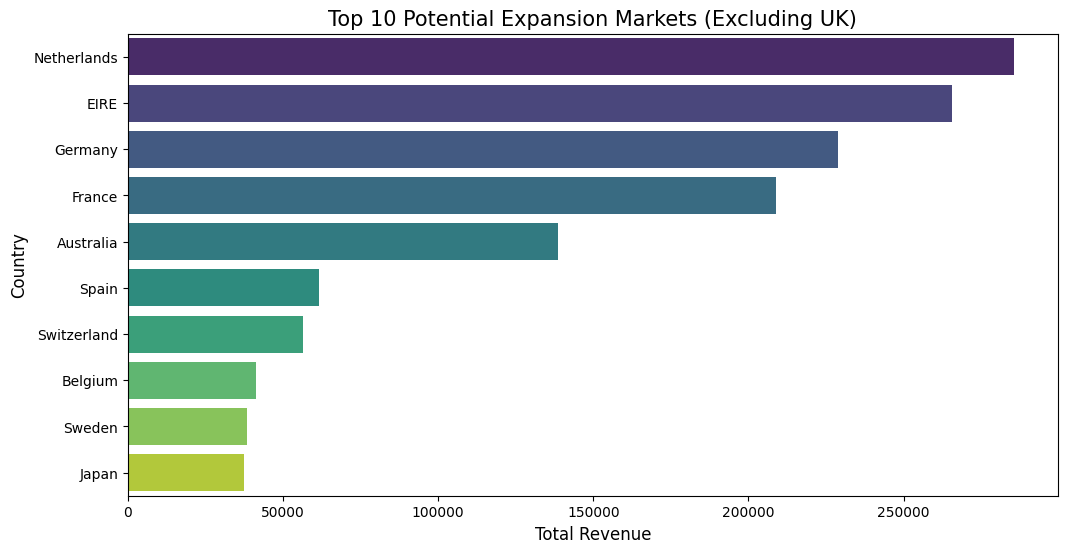

In [38]:
country_revenue = tata_clean.groupby('Country')['Revenue'].sum().reset_index()

# 2. Filter out the United Kingdom (The "1% Analyst" move)
expansion_data = country_revenue[country_revenue['Country'] != 'United Kingdom']

# 3. Sort to find the Top 10
top_10_expansion = expansion_data.sort_values(by='Revenue', ascending=False).head(10)

# 4. Create the Visualization
plt.figure(figsize=(12,6))
sns.barplot(x='Revenue', y='Country', data=top_10_expansion, palette='viridis')
plt.title('Top 10 Potential Expansion Markets (Excluding UK)', fontsize=15)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

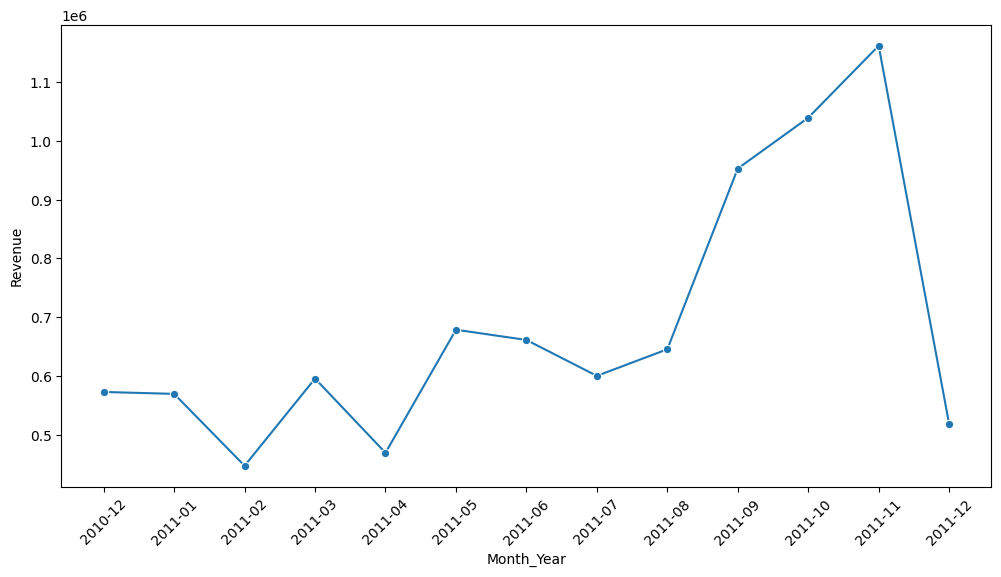

In [42]:
monthly_revenue['Month_Year'] = monthly_revenue['Month_Year'].astype(str)

# NOW run the plot code:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month_Year', y='Revenue', data=monthly_revenue, marker='o')
plt.xticks(rotation=45)
plt.show()